# Computing and Graphing a Best-Fit Curve

In this notebook, we will graph data and calculate the best-fit curve.

## Graphing the Data

Import the `numpy` package to store data in arrays and `matplotlib` to make the graph.

In [1]:
from numpy import *
import matplotlib.pyplot as plt

Use a magic command so the graph appears in the notebook.

In [2]:
%matplotlib inline

Now, we need a data set. Let's use $x(t)$ for a steel ball rolling on a level track. The data below was copied and pasted from Tracker video analysis software.

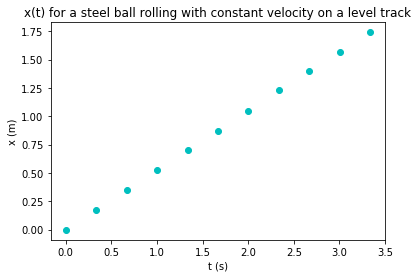

In [3]:
#
# Paste the data you wish to graph in tab-delimited rows in the format:
#
#       xdata <tab> ydata
#
# In this example, the x data is time (s) and y data is 
# x-position (m).
#

datalist = """
0	-0.003
0.334	0.171
0.667	0.346
1.001	0.527
1.335	0.698
1.668	0.872
2.002	1.05
2.336	1.232
2.669	1.403
3.003	1.57
3.337	1.741
""".split('\n') 

#
# Take the list of strings defined above and store it as numbers in lists. 
#

tlist = [] # time data
xlist = [] # x position data

for s in datalist: #s represents a single row of data
    if s:
        t,x = s.split()     # split the string into two strings
        t=float(t)          # convert time string to float
        x=float(x)          # convert x string to float
        tlist.append(t)     # store time in a list
        xlist.append(x)     # store x in a list
        
#
# Plot data in a graph
#

#
# Graph data
#

plt.title('x(t) for a steel ball rolling with constant velocity on a level track')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.plot(tlist,xlist,'co')
plt.show()

## Computing the Best-Fit Curve

We have to import the ``curve_fit`` function from the package ``scipy.optimize`` to compute the best-fit line. We will use matplotlib and numpy for the data and graph.

In [4]:
from scipy.optimize import curve_fit

Since our data is linear, I'll use the venerable

$$y=mx+b$$

as my equation for a line. Create a function that takes an array of data for x values and returns the y values.

In [5]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x+b #linear function

Now convert our lists of data, ``tlist`` and ``xlist``, to arrays ``xarray`` and ``yarray``. Note that time is on the horizontal axis and x-position is on the vertical axis of our graph.

Then pass these arrays along with our best-fit function named ``func`` (which is a line) to ``curve_fit()``. It returns the values of the constants (m and b in this case) for the best fit line as a list, along with statistical measures for each of the constants.  For now, I will ignore the statistics and just get the constants which I will call ``mbest`` and ``bbest``.

In [6]:
#convert list to a numpy array
yarray=asarray(xlist)
xarray=asarray(tlist)
constants, stats = curve_fit(func, xarray, yarray)

#constants is a list
mbest=constants[0] #slope
bbest=constants[1] #intercept

print("Best fit: m=",mbest," and b=",bbest)

Best fit: m= 0.5244386582  and b= -0.00159075185516


We can pass these best-fit values back to our function, obtain the array of best-fit y values, and then graph the best-fit data points along with our measured data points.

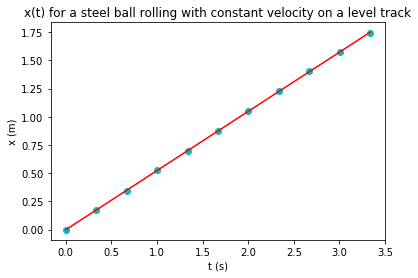

In [7]:
ybest=func(xarray,mbest,bbest) #y values for best fit function

plt.title('x(t) for a steel ball rolling with constant velocity on a level track')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.plot(tlist,xlist,'co',tlist,ybest,'r-')
plt.show()

Once again, there is nothing special here about a line. We can define whatever function we want in ``func()`` so we could certainly obtain a best fit quadratic or exponential for example.